# Import and draw on input images

In [1]:
train_images = 'Images/cherry/train/images'
train_labels = 'Images/cherry/train/labels'

val_images = 'Images/cherry/valid/images'
val_labels = 'Images/cherry/valid/labels'

test_images = 'Images/cherry/test/images'
test_labels = 'Images/cherry/test/labels'

import os

print('Number of train frames: ' + str(len(os.listdir(train_images))))
print('Number of train labels: ' + str(len(os.listdir(train_labels))))
print('Number of val frames: ' + str(len(os.listdir(val_images))))
print('Number of val labels: ' + str(len(os.listdir(val_labels))))
print('Number of test frames: ' + str(len(os.listdir(test_images))))
print('Number of test labels: ' + str(len(os.listdir(test_labels))))
print('Total frames: ' + str(len(os.listdir(train_images)) + len(os.listdir(val_images)) + len(os.listdir(test_images))))

Number of train frames: 123
Number of train labels: 123
Number of val frames: 15
Number of val labels: 15
Number of test frames: 16
Number of test labels: 16
Total frames: 154


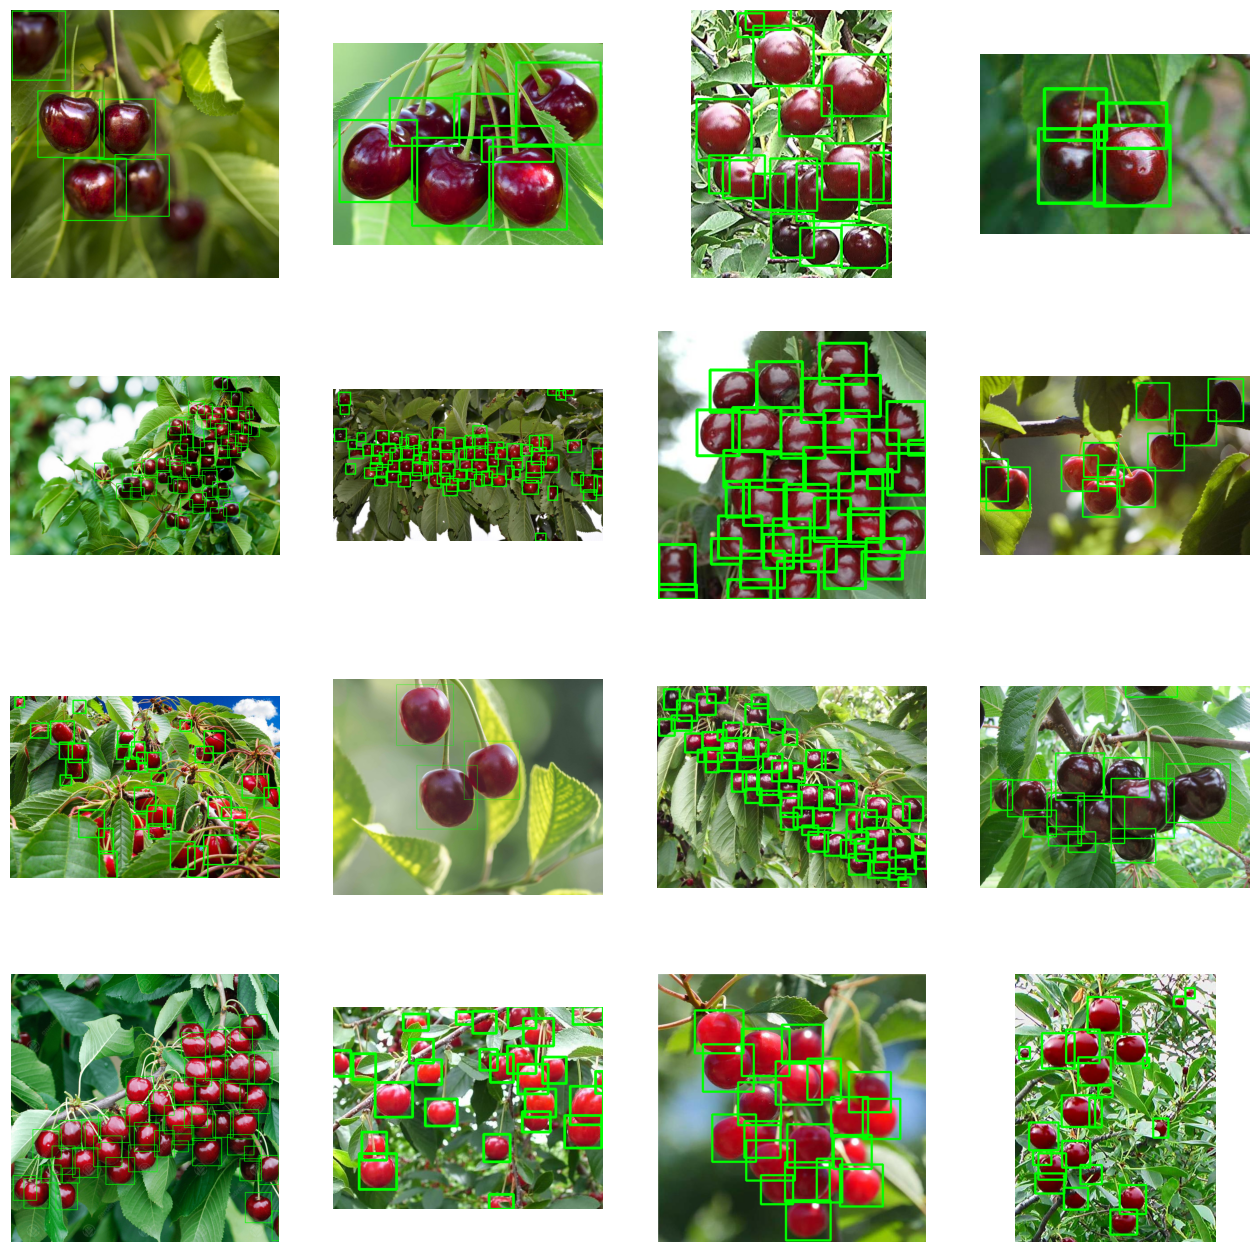

In [2]:
import random
import matplotlib.pyplot as plt
import cv2

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

# Train YOLO model

In [3]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="Images/cherry/data.yaml",  # Path to dataset configuration file
    epochs=50,  # Number of training epochs
    imgsz=640,  # Image size for training
    device="cpu",  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
)

Ultralytics 8.3.140  Python-3.12.8 torch-2.7.0+cpu CPU (AMD Ryzen 5 4600HS with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Images/cherry/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

train: Scanning C:\Users\Buni\Desktop\Python\YOLO_env\Images\cherry\train\labels.cache... 123 images, 1 backgrounds, 0 

val: Fast image access  (ping: 0.00.0 ms, read: 733.9279.9 MB/s, size: 127.4 KB)



C:\Users\Buni\Desktop\Python\YOLO_env\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\Buni\Desktop\Python\YOLO_env\Images\cherry\valid\labels.cache... 15 images, 0 backgrounds, 0 cor
C:\Users\Buni\Desktop\Python\YOLO_env\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.431      3.204      1.325        498        640: 100%|██████████| 8/8 [00:43<00:00,  5.41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495     0.0584      0.531      0.101     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.341      2.593      1.147        310        640: 100%|██████████| 8/8 [00:46<00:00,  5.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.074      0.673      0.238      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.453      2.001      1.131        695        640: 100%|██████████| 8/8 [00:50<00:00,  6.34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495     0.0724      0.659      0.233      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.388      1.675      1.107        725        640: 100%|██████████| 8/8 [00:43<00:00,  5.49
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495     0.0898      0.816      0.242      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.313      1.222      1.104        395        640: 100%|██████████| 8/8 [00:44<00:00,  5.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.124      0.511      0.268      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.327      1.023      1.114        580        640: 100%|██████████| 8/8 [00:42<00:00,  5.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.775      0.131      0.273       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G       1.25     0.9487      1.108        550        640: 100%|██████████| 8/8 [00:42<00:00,  5.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.709      0.246      0.347      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.236     0.9504      1.097        297        640: 100%|██████████| 8/8 [00:44<00:00,  5.61
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.712      0.354      0.542      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.322     0.9105      1.105        352        640: 100%|██████████| 8/8 [00:46<00:00,  5.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.751      0.699      0.753      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.257     0.8905      1.085        421        640: 100%|██████████| 8/8 [00:44<00:00,  5.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.768      0.688       0.76      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.202     0.8713      1.078        463        640: 100%|██████████| 8/8 [00:43<00:00,  5.40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.741      0.721      0.764      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G       1.18     0.8249      1.059        680        640: 100%|██████████| 8/8 [00:46<00:00,  5.76
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.707      0.745       0.78      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.205      0.803      1.049        539        640: 100%|██████████| 8/8 [00:42<00:00,  5.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.791      0.764      0.828      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.218      0.831      1.065        398        640: 100%|██████████| 8/8 [00:45<00:00,  5.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.796      0.752      0.827      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.196     0.8306       1.05        327        640: 100%|██████████| 8/8 [00:44<00:00,  5.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.846      0.755       0.86      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.186     0.7906      1.041        428        640: 100%|██████████| 8/8 [00:43<00:00,  5.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.836      0.735       0.85      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G       1.12     0.7824      1.028        394        640: 100%|██████████| 8/8 [00:42<00:00,  5.32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.816      0.817      0.874      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.157     0.7718      1.039        320        640: 100%|██████████| 8/8 [00:41<00:00,  5.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.863      0.776      0.868      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.124      0.736       1.04        537        640: 100%|██████████| 8/8 [00:39<00:00,  4.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.871      0.778      0.884      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.127     0.7433      1.029        695        640: 100%|██████████| 8/8 [00:42<00:00,  5.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495       0.86      0.778      0.871      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.134     0.7447      1.018        398        640: 100%|██████████| 8/8 [00:42<00:00,  5.37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.892      0.772      0.884      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.161     0.7454       1.03        416        640: 100%|██████████| 8/8 [00:43<00:00,  5.40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.869      0.763      0.851      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.125     0.7497      1.035        431        640: 100%|██████████| 8/8 [00:42<00:00,  5.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.903      0.796      0.896      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.144     0.7351       1.04        341        640: 100%|██████████| 8/8 [00:45<00:00,  5.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.867      0.833        0.9      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.085     0.6941      1.007        370        640: 100%|██████████| 8/8 [00:40<00:00,  5.08
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.859      0.809      0.889      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.104     0.7065      1.019        287        640: 100%|██████████| 8/8 [00:45<00:00,  5.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.881      0.808      0.911      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.116      0.698      1.018        490        640: 100%|██████████| 8/8 [00:41<00:00,  5.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495       0.86      0.795      0.887      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.092     0.6945      1.008        625        640: 100%|██████████| 8/8 [00:42<00:00,  5.31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.897      0.814      0.915      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.117       0.69      1.017        521        640: 100%|██████████| 8/8 [00:47<00:00,  5.92
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.881       0.84      0.918      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.074     0.6686      1.001        386        640: 100%|██████████| 8/8 [00:47<00:00,  6.00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.877      0.828      0.911       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.064     0.6805      1.011        346        640: 100%|██████████| 8/8 [00:45<00:00,  5.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.919      0.808      0.919      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.071     0.6541      1.009        305        640: 100%|██████████| 8/8 [00:47<00:00,  5.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.894      0.818      0.914      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.068     0.6565      1.002        675        640: 100%|██████████| 8/8 [00:43<00:00,  5.38
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.881      0.822      0.919       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.044      0.651      1.006        452        640: 100%|██████████| 8/8 [00:38<00:00,  4.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.885      0.839      0.916      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G       1.01       0.64     0.9949        366        640: 100%|██████████| 8/8 [00:44<00:00,  5.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495       0.88      0.846      0.919      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G       1.01     0.6268     0.9803        459        640: 100%|██████████| 8/8 [00:42<00:00,  5.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.907      0.827      0.922      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.054     0.6293     0.9879        392        640: 100%|██████████| 8/8 [00:43<00:00,  5.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.875      0.842      0.917      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.037     0.6407     0.9993        435        640: 100%|██████████| 8/8 [00:46<00:00,  5.75
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.861      0.842      0.909      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.017     0.6128     0.9774        427        640: 100%|██████████| 8/8 [00:42<00:00,  5.30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.888      0.834      0.915      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.031     0.6297     0.9969        333        640: 100%|██████████| 8/8 [00:40<00:00,  5.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.873      0.842      0.921      0.583


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


C:\Users\Buni\Desktop\Python\YOLO_env\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      41/50         0G      1.008     0.7159     0.9953        180        640: 100%|██████████| 8/8 [00:38<00:00,  4.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495       0.87      0.809      0.898      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.024     0.6612     0.9888        233        640: 100%|██████████| 8/8 [00:39<00:00,  4.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.874       0.83      0.909      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9946     0.6544     0.9657        425        640: 100%|██████████| 8/8 [00:41<00:00,  5.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.879      0.834      0.911      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9959     0.6258     0.9747        343        640: 100%|██████████| 8/8 [00:41<00:00,  5.13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         15        495      0.888      0.835      0.919      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9889     0.6264     0.9663        373        640: 100%|██████████| 8/8 [00:46<00:00,  5.83
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.905       0.83      0.918      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      0.975     0.6159     0.9744        238        640: 100%|██████████| 8/8 [00:40<00:00,  5.07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495       0.89      0.832      0.919      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9639     0.6079     0.9643        327        640: 100%|██████████| 8/8 [00:39<00:00,  4.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495        0.9      0.821      0.925      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9517     0.6045     0.9716        186        640: 100%|██████████| 8/8 [00:41<00:00,  5.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495       0.89      0.846      0.925      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.9857     0.6139     0.9589        426        640: 100%|██████████| 8/8 [00:46<00:00,  5.77
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.888      0.851      0.925      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9767     0.6237     0.9751        438        640: 100%|██████████| 8/8 [00:43<00:00,  5.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         15        495      0.882      0.849      0.924      0.589



50 epochs completed in 0.652 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 5.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.140  Python-3.12.8 torch-2.7.0+cpu CPU (AMD Ryzen 5 4600HS with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0


                   all         15        495      0.904       0.83      0.918      0.599
Speed: 2.2ms preprocess, 70.9ms inference, 0.0ms loss, 37.4ms postprocess per image
Results saved to runs\detect\train2


# Visualise training result

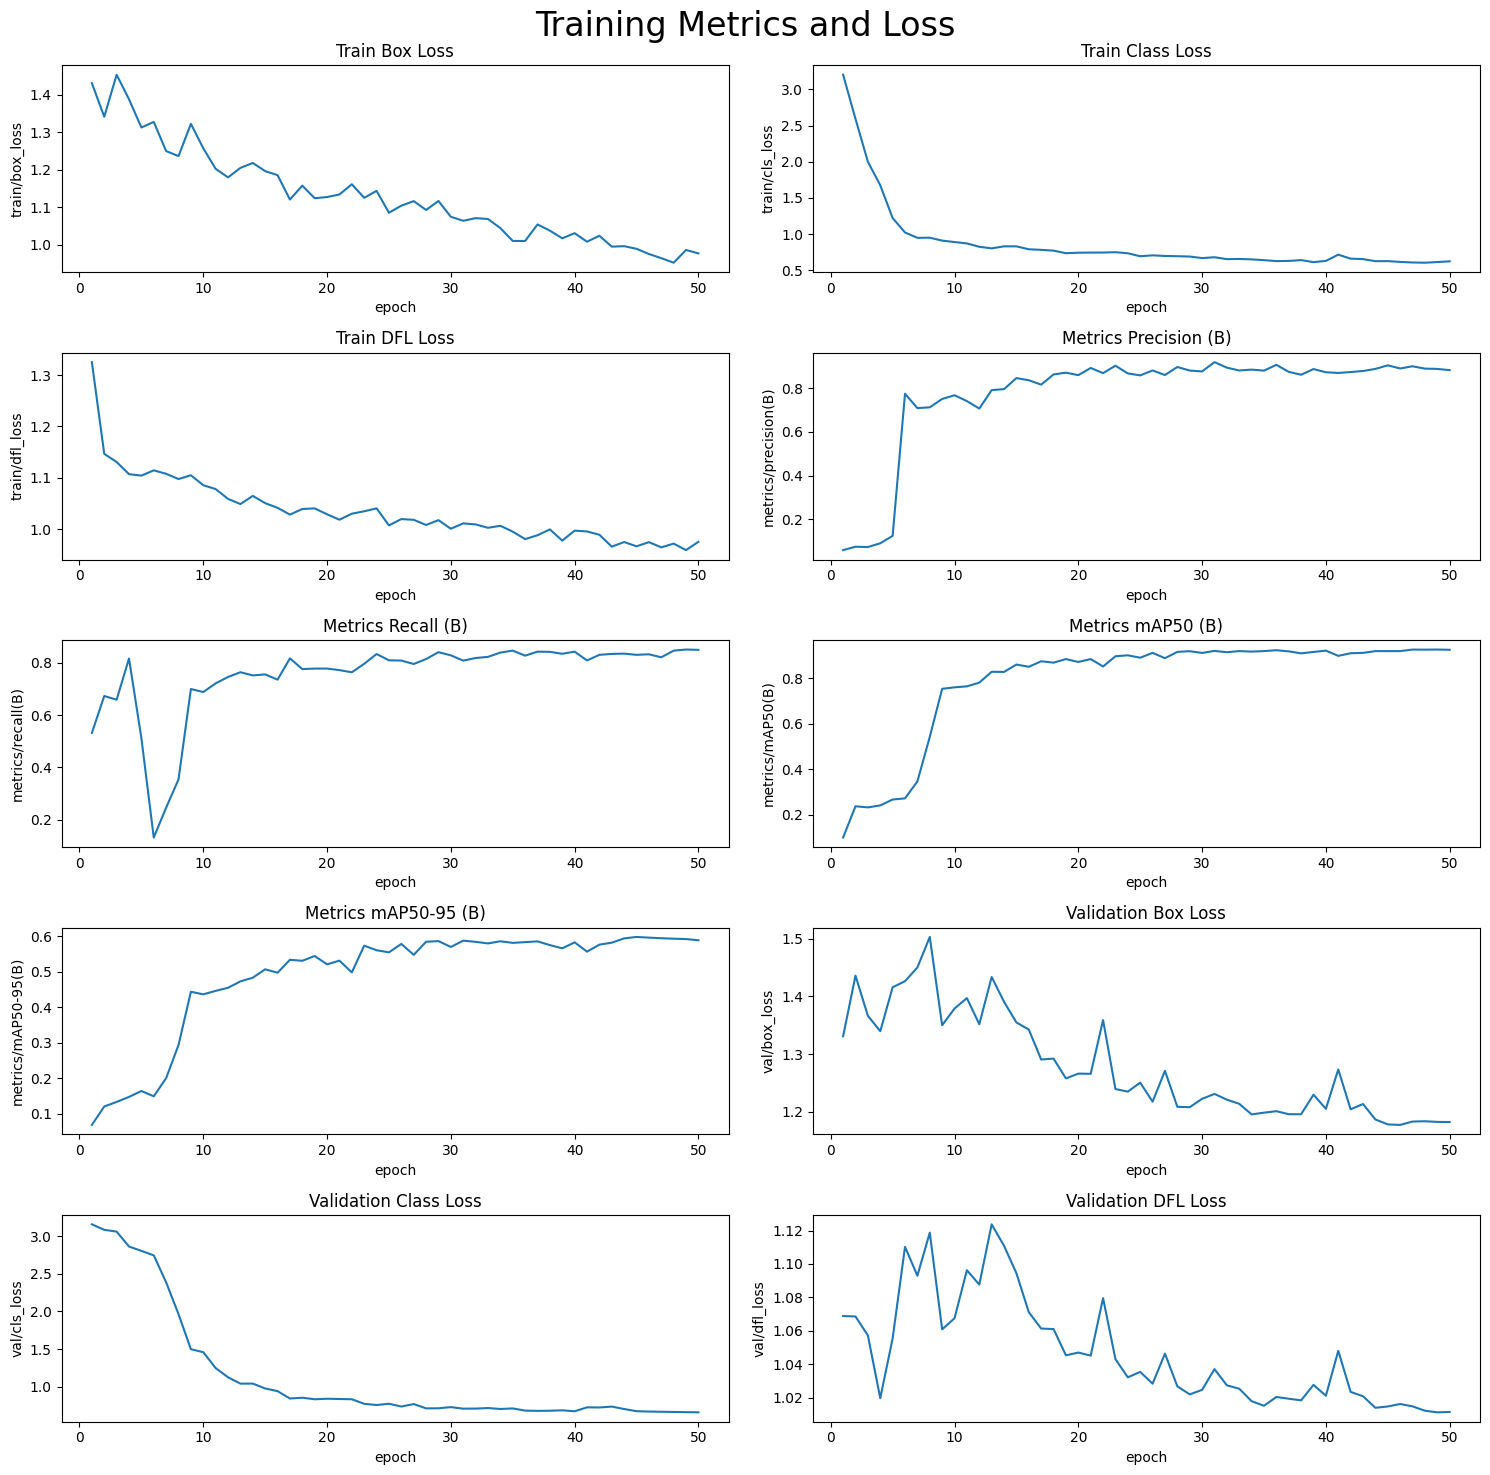

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read in the results.csv file as a pandas dataframe
df = pd.read_csv('runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# Predict on test set

In [8]:
def pred_images(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 640x640 15 cherrys, 134.4ms
Speed: 6.0ms preprocess, 134.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 20 cherrys, 85.4ms
Speed: 6.2ms preprocess, 85.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x544 70 cherrys, 96.6ms
Speed: 5.1ms preprocess, 96.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 544)

0: 640x640 43 cherrys, 91.5ms
Speed: 5.6ms preprocess, 91.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x544 31 cherrys, 76.2ms
Speed: 4.8ms preprocess, 76.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)

0: 384x640 91 cherrys, 81.4ms
Speed: 2.3ms preprocess, 81.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 12 cherrys, 103.5ms
Speed: 3.0ms preprocess, 103.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 15 cherrys, 78.5ms
Speed: 3.5ms preprocess, 78.5ms inference, 1.2ms postprocess per imag

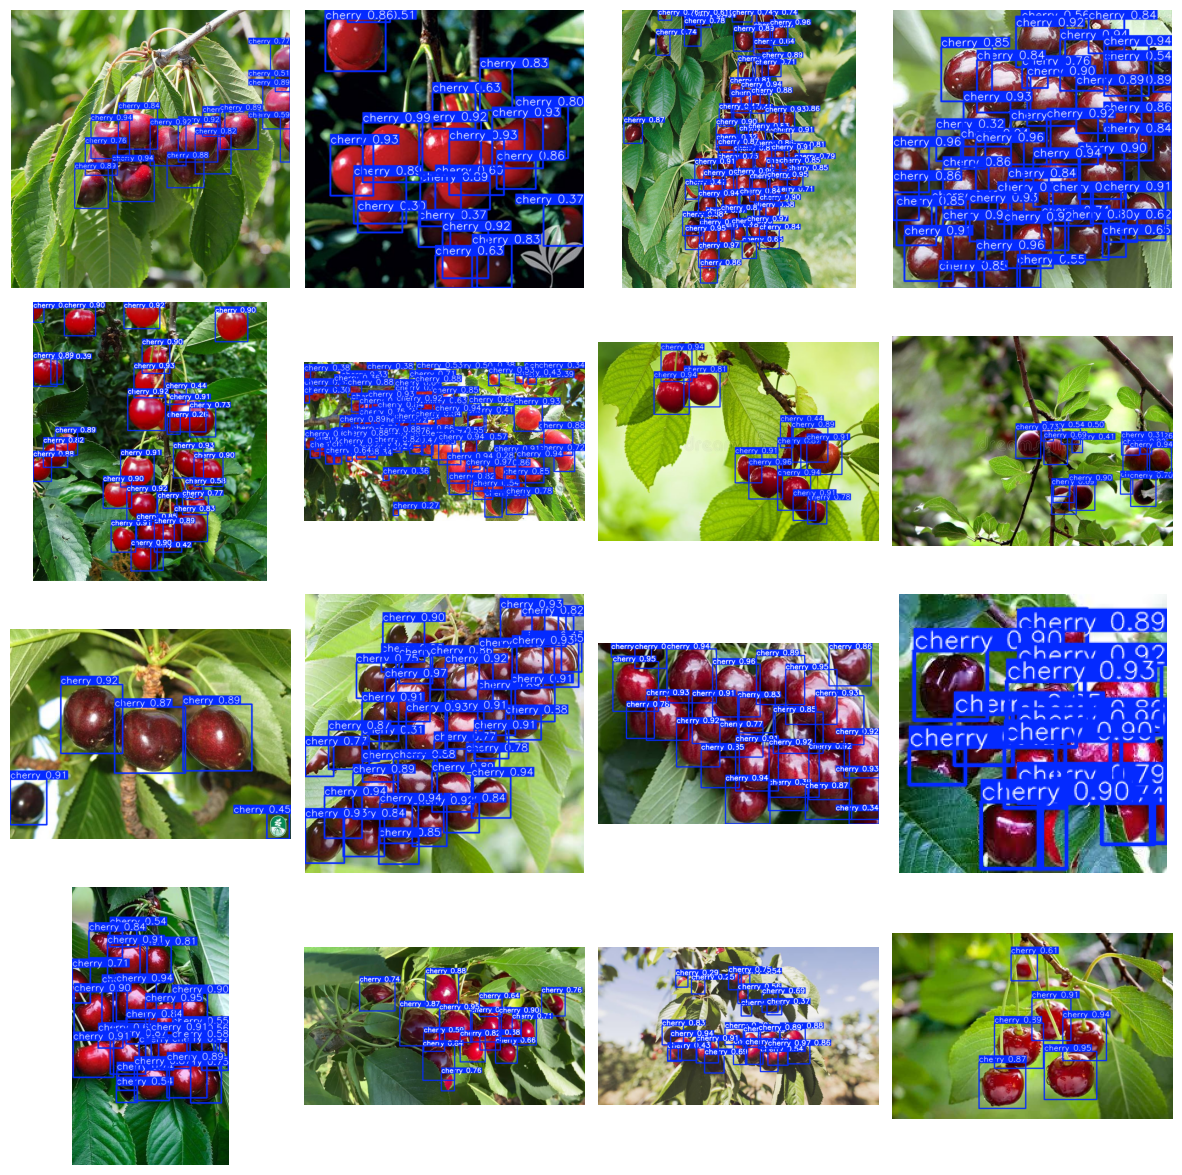

In [14]:
# Get the list of image files in the directory
image_files = os.listdir(test_images)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(image_files):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(test_images, img_file)
    detect_img = pred_images(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)